In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 500)

In [2]:
df = pd.read_csv('/Users/matthew/Documents/citadel/basic_cancelled.csv')
df = df[df['Year'] != 1996]
df = df[df['amt_quarters_past'] > 8]

In [3]:
fares = pd.read_csv('/Users/matthew/Documents/citadel/Consumer_Airfare_Report__Table_6_-_Contiguous_State_City-Pair_Markets_That_Average_At_Least_10_Passengers_Per_Day.csv')

/var/folders/bw/5y6vvgld6yv27r1hv8xx5dq80000gn/T/ipykernel_48898/2893450858.py:1: DtypeWarning: Columns (17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  fares = pd.read_csv('/Users/matthew/Documents/citadel/Consumer_Airfare_Report__Table_6_-_Contiguous_State_City-Pair_Markets_That_Average_At_Least_10_Passengers_Per_Day.csv')


In [4]:
# Find aveerage flight fare for every quarter
benchmark = {year:{q:None for q in [1, 2, 3, 4]} for year in range(1996, 2023)}

for year in range(1996, 2023):
    for quarter in [1, 2, 3, 4]:
        tmp = fares[fares['Year'] == year]
        tmp = tmp[tmp['quarter'] == quarter]

        sum = 0

        for i, row in tmp.iterrows():
            sum += row['passengers'] * row['fare']

        benchmark[year][quarter] = (sum / tmp['passengers'].sum())

benchmark

{1996: {1: 173.66899142117194,
  2: 169.3565667792135,
  3: 168.94761057354663,
  4: 171.15505881820397},
 1997: {1: 174.73851577584333,
  2: 176.75358819743823,
  3: 173.97327740489538,
  4: 178.26165720618212},
 1998: {1: 186.12094315484455,
  2: 182.66677516708657,
  3: 180.111657405313,
  4: 177.80105135146692},
 1999: {1: 188.7061912861108,
  2: 185.59298530973552,
  3: 180.95872919855265,
  4: 178.51737006463722},
 2000: {1: 193.0427032481535,
  2: 191.0623219381223,
  3: 190.09778011252772,
  4: 187.84616060089078},
 2001: {1: 192.28293554485464,
  2: 180.5038512027789,
  3: 166.53710421145436,
  4: 163.80149850438082},
 2002: {1: 174.82328060261221,
  2: 171.93160259825387,
  3: 165.36125279603147,
  4: 166.91607542534382},
 2003: {1: 174.32258777315886,
  2: 170.16069310181138,
  3: 169.40516395301887,
  4: 169.31414923255022},
 2004: {1: 173.18568797545308,
  2: 167.1687921106264,
  3: 160.4258536938681,
  4: 160.1213919734889},
 2005: {1: 163.76999531828773,
  2: 167.3863687

In [5]:
# Create dictionary used to extract expieremental group data
prior_fares = {}

for i, row in df.iterrows():
    if (row['citymarketid_1'], row['citymarketid_2']) in prior_fares or (row['citymarketid_2'], row['citymarketid_1']) in prior_fares:
        pass
    else:
        prior_fares[(row['citymarketid_1'], row['citymarketid_2'])] = {year:{q:None for q in [1, 2, 3, 4]} for year in range(row['Year'] - 2, row['Year'] + 1)}

        for q in range(row['quarter'] + 1, 5):
            del prior_fares[(row['citymarketid_1'], row['citymarketid_2'])][row['Year']][q]


prior_fares

{(31067, 34100): {1997: {1: None, 2: None, 3: None, 4: None},
  1998: {1: None, 2: None, 3: None, 4: None},
  1999: {1: None}},
 (34986, 35165): {1997: {1: None, 2: None, 3: None, 4: None},
  1998: {1: None, 2: None, 3: None, 4: None},
  1999: {1: None}},
 (30620, 31884): {1997: {1: None, 2: None, 3: None, 4: None},
  1998: {1: None, 2: None, 3: None, 4: None},
  1999: {1: None}},
 (31823, 30693): {1997: {1: None, 2: None, 3: None, 4: None},
  1998: {1: None, 2: None, 3: None, 4: None},
  1999: {1: None}},
 (31252, 31650): {1997: {1: None, 2: None, 3: None, 4: None},
  1998: {1: None, 2: None, 3: None, 4: None},
  1999: {1: None}},
 (31423, 33851): {1997: {1: None, 2: None, 3: None, 4: None},
  1998: {1: None, 2: None, 3: None, 4: None},
  1999: {1: None}},
 (32337, 35412): {1997: {1: None, 2: None, 3: None, 4: None},
  1998: {1: None, 2: None, 3: None, 4: None},
  1999: {1: None}},
 (33195, 30424): {1997: {1: None, 2: None, 3: None, 4: None},
  1998: {1: None, 2: None, 3: None, 4: Non

In [6]:
# Extract expieremental data

for i, row in fares.iterrows():
    if (row['citymarketid_1'], row['citymarketid_2']) in prior_fares:
        if row['Year'] not in prior_fares[(row['citymarketid_1'], row['citymarketid_2'])]: continue
        if row['quarter'] not in prior_fares[(row['citymarketid_1'], row['citymarketid_2'])][row['Year']]: continue
        prior_fares[(row['citymarketid_1'], row['citymarketid_2'])][row['Year']][row['quarter']] = row['fare']
    elif (row['citymarketid_2'], row['citymarketid_1']) in prior_fares:
        if row['Year'] not in prior_fares[(row['citymarketid_2'], row['citymarketid_1'])]: continue
        if row['quarter'] not in prior_fares[(row['citymarketid_2'], row['citymarketid_1'])][row['Year']]: continue
        prior_fares[(row['citymarketid_2'], row['citymarketid_1'])][row['Year']][row['quarter']] = row['fare']

prior_fares

{(31067, 34100): {1997: {1: 245.08, 2: 231.21, 3: 244.25, 4: 222.77},
  1998: {1: 257.3, 2: 231.86, 3: 246.57, 4: 237.6},
  1999: {1: 245.73}},
 (34986, 35165): {1997: {1: 133.0, 2: 136.16, 3: 137.41, 4: 143.83},
  1998: {1: 139.61, 2: 143.18, 3: 127.12, 4: 128.72},
  1999: {1: 129.24}},
 (30620, 31884): {1997: {1: 167.05, 2: 169.48, 3: 178.07, 4: 147.7},
  1998: {1: 180.76, 2: 174.11, 3: 222.34, 4: 200.35},
  1999: {1: 244.66}},
 (31823, 30693): {1997: {1: 200.42, 2: 213.87, 3: 215.46, 4: 216.66},
  1998: {1: 245.13, 2: 250.5, 3: 238.88, 4: 231.27},
  1999: {1: 245.04}},
 (31252, 31650): {1997: {1: 217.97, 2: 204.63, 3: 158.03, 4: 223.99},
  1998: {1: 252.17, 2: 205.43, 3: 213.8, 4: 212.71},
  1999: {1: 211.48}},
 (31423, 33851): {1997: {1: 217.92, 2: 199.57, 3: 188.05, 4: 222.44},
  1998: {1: 202.16, 2: 215.29, 3: 177.09, 4: 212.83},
  1999: {1: 246.72}},
 (32337, 35412): {1997: {1: 229.19, 2: 230.25, 3: 238.35, 4: 234.96},
  1998: {1: 244.3, 2: 238.18, 3: 236.17, 4: 231.31},
  1999:

In [7]:
# Adjust expieremental group with benchmark data

for k, v in prior_fares.items():
    for year, lst in v.items():
        for quarter, val in lst.items():
            if val:
                prior_fares[k][year][quarter] = (val - benchmark[year][quarter]) / benchmark[year][quarter]


prior_fares


{(31067,
  34100): {1997: {1: 0.4025528310792773,
   2: 0.3080922563322029,
   3: 0.40395124839515795,
   4: 0.24967984417612796}, 1998: {1: 0.38243443020776857,
   2: 0.26930581540028864,
   3: 0.36898412658061847,
   4: 0.3363250565393224}, 1999: {1: 0.30218303027181215}},
 (34986,
  35165): {1997: {1: -0.23886271203874707,
   2: -0.22966203182304945,
   3: -0.21016605509937095,
   4: -0.19315234552294971}, 1998: {1: -0.24989634356274162,
   2: -0.21616834879231725,
   3: -0.29421558920011265,
   4: -0.2760447757670809}, 1999: {1: -0.3151258094968908}},
 (30620,
  31884): {1997: {1: -0.04400012064716307,
   2: -0.041151007295611226,
   3: 0.023547999188232412,
   4: -0.1714426853489515}, 1998: {1: -0.028803546038257986,
   2: -0.046843631849632285,
   3: 0.23445646552271046,
   4: 0.12682123349180655}, 1999: {1: 0.29651284005331696}},
 (31823,
  30693): {1997: {1: 0.14697094175334063,
   2: 0.20998958030261766,
   3: 0.23846606337449638,
   4: 0.21540438586524158}, 1998: {1: 0.317046

In [8]:
# Create dictionary used to extract control group data

sustained = {}

for i, row in fares.iterrows():
    if (row['citymarketid_1'], row['citymarketid_2']) in prior_fares or (row['citymarketid_2'], row['citymarketid_1']) in prior_fares:
        pass
    elif (row['citymarketid_1'], row['citymarketid_2']) in sustained or (row['citymarketid_2'], row['citymarketid_1']) in sustained:
        pass
    else:
        sustained[(row['citymarketid_1'], row['citymarketid_2'])] = {year:{q:None for q in [1, 2, 3, 4]} for year in range(1996, row['Year'] + 1)}

        for q in range(row['quarter'] + 1, 5):
            del sustained[(row['citymarketid_1'], row['citymarketid_2'])][row['Year']][q]


sustained

{(33851, 34027): {1996: {1: None, 2: None, 3: None, 4: None},
  1997: {1: None, 2: None, 3: None, 4: None},
  1998: {1: None, 2: None, 3: None, 4: None},
  1999: {1: None, 2: None, 3: None, 4: None},
  2000: {1: None, 2: None, 3: None, 4: None},
  2001: {1: None, 2: None, 3: None, 4: None},
  2002: {1: None, 2: None, 3: None, 4: None},
  2003: {1: None, 2: None, 3: None, 4: None},
  2004: {1: None, 2: None}},
 (30693, 34027): {1996: {1: None, 2: None, 3: None, 4: None},
  1997: {1: None, 2: None, 3: None, 4: None},
  1998: {1: None, 2: None, 3: None, 4: None},
  1999: {1: None, 2: None, 3: None, 4: None},
  2000: {1: None, 2: None, 3: None, 4: None},
  2001: {1: None, 2: None, 3: None, 4: None},
  2002: {1: None, 2: None, 3: None, 4: None},
  2003: {1: None, 2: None}},
 (33198, 30424): {1996: {1: None, 2: None, 3: None, 4: None},
  1997: {1: None, 2: None, 3: None, 4: None},
  1998: {1: None, 2: None, 3: None, 4: None},
  1999: {1: None, 2: None, 3: None, 4: None},
  2000: {1: None, 2:

In [9]:
# Extract control data

for i, row in fares.iterrows():
    if (row['citymarketid_1'], row['citymarketid_2']) in sustained:
        if row['Year'] not in sustained[(row['citymarketid_1'], row['citymarketid_2'])]: continue
        if row['quarter'] not in sustained[(row['citymarketid_1'], row['citymarketid_2'])][row['Year']]: continue
        sustained[(row['citymarketid_1'], row['citymarketid_2'])][row['Year']][row['quarter']] = row['fare']
    elif (row['citymarketid_2'], row['citymarketid_1']) in sustained:
        if row['Year'] not in sustained[(row['citymarketid_2'], row['citymarketid_1'])]: continue
        if row['quarter'] not in sustained[(row['citymarketid_2'], row['citymarketid_1'])][row['Year']]: continue
        sustained[(row['citymarketid_2'], row['citymarketid_1'])][row['Year']][row['quarter']] = row['fare']

sustained

{(33851, 34027): {1996: {1: 216.02, 2: 218.65, 3: 186.88, 4: 158.37},
  1997: {1: 194.66, 2: 177.22, 3: 171.92, 4: 168.66},
  1998: {1: 191.52, 2: 202.14, 3: 193.84, 4: 182.0},
  1999: {1: 208.75, 2: 192.78, 3: 202.09, 4: 188.02},
  2000: {1: 241.16, 2: 200.04, 3: 204.92, 4: 212.65},
  2001: {1: 217.1, 2: 218.45, 3: 200.6, 4: 205.47},
  2002: {1: 206.6, 2: 237.05, 3: 193.79, 4: 195.1},
  2003: {1: 230.65, 2: 209.19, 3: 218.68, 4: 238.4},
  2004: {1: 218.8, 2: 242.51}},
 (30693, 34027): {1996: {1: 168.34, 2: 160.1, 3: 134.5, 4: 146.79},
  1997: {1: 164.28, 2: 162.09, 3: 141.78, 4: 150.88},
  1998: {1: 183.53, 2: 153.34, 3: 154.69, 4: 170.4},
  1999: {1: 178.68, 2: 166.06, 3: 147.87, 4: 142.9},
  2000: {1: 175.61, 2: 165.23, 3: 146.3, 4: 147.84},
  2001: {1: 135.22, 2: 122.58, 3: 122.41, 4: 119.11},
  2002: {1: 130.1, 2: 126.64, 3: 124.14, 4: 138.96},
  2003: {1: 144.72, 2: 136.0}},
 (33198, 30424): {1996: {1: None, 2: None, 3: None, 4: None},
  1997: {1: None, 2: None, 3: 202.37, 4: Non

In [10]:
# Adjust control group with benchmark data

for k, v in sustained.items():
    for year, lst in v.items():
        for quarter, val in lst.items():
            if val:
                sustained[k][year][quarter] = (val - benchmark[year][quarter]) / benchmark[year][quarter]


sustained

{(33851,
  34027): {1996: {1: 0.243860508616192,
   2: 0.29106301667681594,
   3: 0.10614171674625138,
   4: -0.07469869080401469}, 1997: {1: 0.11400740206419169,
   2: 0.0026387685099822224,
   3: -0.011802257424378557,
   4: -0.053862717068071435}, 1998: {1: 0.029008325197791823,
   2: 0.10660518211426857,
   3: 0.07622128846326436,
   4: 0.02361599448719139}, 1999: {1: 0.10621701692606031,
   2: 0.03872460307845197,
   3: 0.11677397876872563,
   4: 0.05323084208512649}, 2000: {1: 0.24925726765228962,
   2: 0.046988218141645006,
   3: 0.07797155694663194,
   4: 0.1320433663363977}, 2001: {1: 0.12906535041616407,
   2: 0.210223485783648,
   3: 0.2045363761417127,
   4: 0.2543841288149435}, 2002: {1: 0.18176480436618103,
   2: 0.3787459455834065,
   3: 0.17191903619062804,
   4: 0.16885087013240935}, 2003: {1: 0.3231217075559849,
   2: 0.22936734792703517,
   3: 0.29086974031468443,
   4: 0.4080335345899621}, 2004: {1: 0.2633838428439433,
   2: 0.450689431550809}},
 (30693,
  34027): {

In [11]:
from scipy.stats import linregress
import math
import statistics

In [12]:
# run regression on expieremental group

exp_trend = []
for flight, year_dict in prior_fares.items():
    value_list = []
    for year, quarter_dict in year_dict.items():
        for quarter, value in quarter_dict.items():
            value_list.append(value)

    for i in range(len(value_list)-1, -1, -1):
        if not value_list[i]:
            value_list = value_list[i+1:]

    slope, intercept, r_value, p_value, std_err = linregress(range(len(value_list)), value_list)

    exp_trend.append(slope)


In [13]:
# run regression on control group

con_trend = []
for flight, year_dict in sustained.items():
    value_list = []
    for year, quarter_dict in year_dict.items():
        for quarter, value in quarter_dict.items():
            value_list.append(value)
    try:
        for i in range(len(value_list)-1, -1, -1):
            if not value_list[i]:
                value_list = value_list[i+1:]

        slope, intercept, r_value, p_value, std_err = linregress(range(len(value_list)), value_list)

        con_trend.append(slope)
    except:
        pass

con_trend = [t for t in con_trend if not math.isnan(t)]

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


In [14]:
# Size of datasets

print(len(exp_trend), len(con_trend))

2380 3287


In [15]:
# Proportion of group that is positive

pos1 = [t for t in exp_trend if t > 0]
pos2 = [t for t in con_trend if t > 0]

print(len(pos1) / len(exp_trend))
print(len(pos2) / len(con_trend))

0.6991596638655462
0.5451779738363249


In [16]:
# Mean of each group

exp_mean = np.mean(exp_trend)
con_mean = np.mean(con_trend)

print(exp_mean, con_mean)

0.010098529541019028 -0.0007925336727014265


In [17]:
exp_sdv = np.std(exp_trend)
con_sdv = np.std(con_trend)

print(exp_sdv, con_sdv)

0.022847282503653876 0.026561265389556648


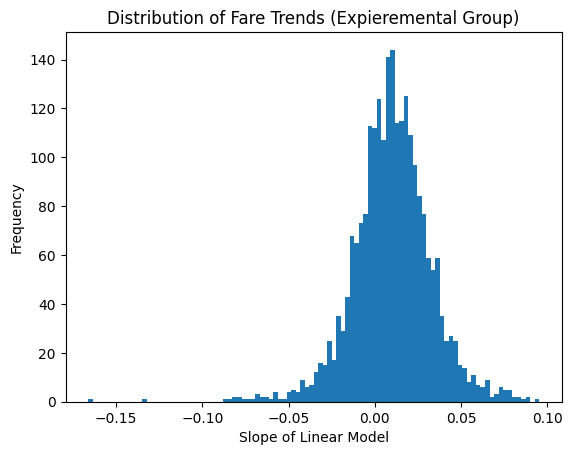

In [18]:
# graph distrubtion of expieremental group

plt.hist(exp_trend, bins=100)

plt.xlabel('Slope of Linear Model')
plt.ylabel('Frequency')
plt.title('Distribution of Fare Trends (Expieremental Group)')

plt.show()

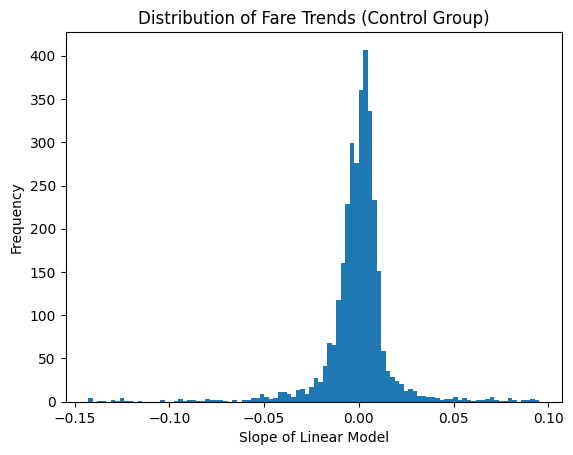

In [19]:
# graph distrubution of control group
con_graph = [t for t in con_trend if t < 0.1 and t > -0.15] # removes outliears to make graph more readible

plt.hist(con_graph, bins=100)

plt.xlabel('Slope of Linear Model')
plt.ylabel('Frequency')
plt.title('Distribution of Fare Trends (Control Group)')

plt.show()